In [2]:
pip install --user sklearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
insurance = pd.read_csv("C:/Users/Anukriti/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
insurance[['sex','smoker','region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [26]:
# Replacing string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0,      'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [27]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


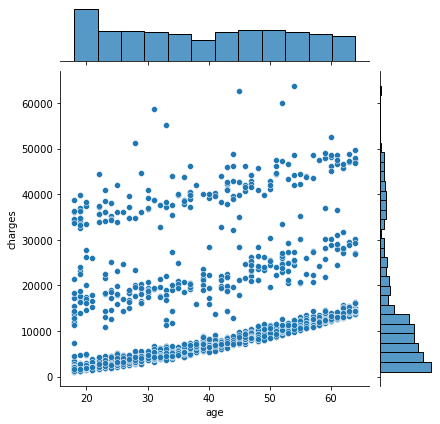

In [28]:
import seaborn as sns
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=insurance['age'],y=insurance['charges'])

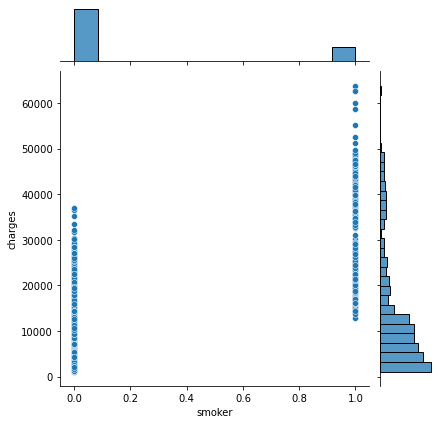

In [29]:
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=insurance['smoker'],y=insurance['charges'])

In [30]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
# features
X = insurance[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
Y = insurance['charges']

In [32]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [33]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [34]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [35]:
len(X_test) # 402
len(X_train) # 936
len(insurance) # 1338

1338

In [36]:
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
# Predicting the target variable for test datset
predictions = model.predict(X_test)

In [38]:
predictions[0:5]

array([28747.12624599, 13532.31915875,  2643.27225876, 39968.03103661,
       13892.57503465])

Text(0, 0.5, 'Predicted Y')

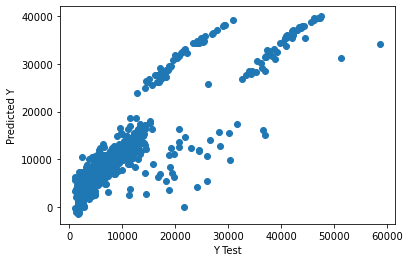

In [39]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
# Predict charges for new customer : Name- Frank
data = {'age' : 40,'sex' : 1,'bmi' : 45.50,'children' : 4,'smoker' : 1,'region' : 3}
index = [1]
frank_df = pd.DataFrame(data,index)
frank_df

,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [41]:
prediction_frank = model.predict(frank_df)
print("Medical Insurance cost for Frank is : ",prediction_frank)

Medical Insurance cost for Frank is :  [39636.28078779]


In [42]:
# Predict charges for new customer : Name- Frank
data = {'age' : 23,'sex' : 0,'bmi' : 40.5,'children' : 0,'smoker' : 0,'region' : 1}
index = [1]
tori_df = pd.DataFrame(data,index)
tori_df

,age,sex,bmi,children,smoker,region
1,23,0,40.5,0,0,1


In [43]:
prediction_tori = model.predict(tori_df)
print("Medical Insurance cost for Tori is : ",prediction_tori)

Medical Insurance cost for Tori is :  [6444.57019138]
